# Readme

This project shows to diffrent methods for applying a linear regression to the data. The first method applies a linear regression by training a neuron. The second methods applies a linear regression using the Least Squares Error formula. The results were the same. 

# Exploratory Data Analysis

### Libraries

In [1]:
import numpy as np
import torch 
import matplotlib.pyplot as plt
from torch import nn
import pandas as pd

### Load Data

Data

In [2]:
input = [1, 2, 3, 4, 5, 6, 7, 8, 9,10]
output = [4, 7, 5.5, 10.0, 9.0, 14.5, 12.0, 18.0, 15, 20]

Data frame

In [3]:
df = pd.DataFrame({
    "input": input, 
    "output": output
})

### Visuzalize data

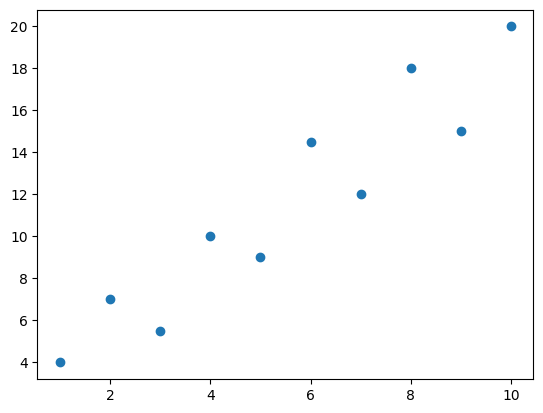

In [4]:
plt.scatter(input,output)
plt.show()

# Method 1: Linear Regression via Neuron trained with Gradient Descent

Nueron:
$$
\hat{y}_i = wx_i + b
$$

Loss Function:
$$
L = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Substitute Nueron in Loss Function:
$$
L = \frac{1}{n} \sum_{i=1}^{n} (y_i - (wx_i + b))^2
$$

Gradient w.r.t. Weight (w):
$$
\frac{\partial L}{\partial w} = \frac{2}{n} \sum_{i=1}^{n} (wx_i + b - y_i)x_i
$$

Gradient w.r.t. Bias (b):
$$
\frac{\partial L}{\partial b} = \frac{2}{n} \sum_{i=1}^{n} (wx_i + b - y_i)
$$



Stochastic Gradient Descent for Weight (w) parameter:

$$
w \leftarrow w - \eta \frac{\partial L}{\partial w}
$$


Stochastic Gradient Descent for Bias (b) parameter:

$$
b \leftarrow b - \eta \frac{\partial L}{\partial b}
$$


Regression line after training

$$
y = wx + b
$$


### Model

Data to tensor

In [5]:
X = torch.tensor(df["input"].values,dtype=torch.float32).unsqueeze(1)
y = torch.tensor(df["output"].values,dtype=torch.float32).unsqueeze(1)

print(X.shape)
print(y.shape)

torch.Size([10, 1])
torch.Size([10, 1])


neurel network

In [6]:
model = nn.Linear(1, 1)  #y = wx+b , w=weight=slope, b=bias=intercept
loss_fn = torch.nn.MSELoss() #Loss = Mean Squared Error (MSE) 
optimizer = torch.optim.SGD(model.parameters(), lr=0.001) #Optimizer = Stochastic Gradient Descent with a very small learning rate.

Set initial paramters

In [7]:
with torch.no_grad():
    model.weight.fill_(0)
    model.bias.fill_(10)

Training loop

In [8]:
losses_list = []
w_list = []
b_list = []
parameter_list = []

for i in range(0,20000):

    # Training pass
    optimizer.zero_grad()
    outputs = model(X)
    loss = loss_fn(outputs, y)
    loss.backward()
    optimizer.step()

    w = model.weight.item()
    b = model.bias.item()

    w_list.append(w)
    b_list.append(b)
    parameter_list.append((w,b))

    # loss fucntion
    losses_list.append(loss.item())

Visualize loss function

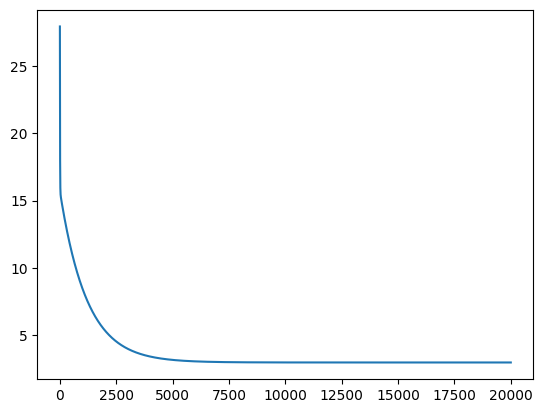

In [9]:
plt.plot(losses_list)
plt.show()

In [19]:
w = model.weight.item()
b = model.bias.item()
print(f"Trained formula: y = {w:.4f} * x + {b:.4f}")
print(f"Trained formula: y = {round(w,2):} * x + {round(b,2):}")

Trained formula: y = 1.6604 * x + 2.3684
Trained formula: y = 1.66 * x + 2.37


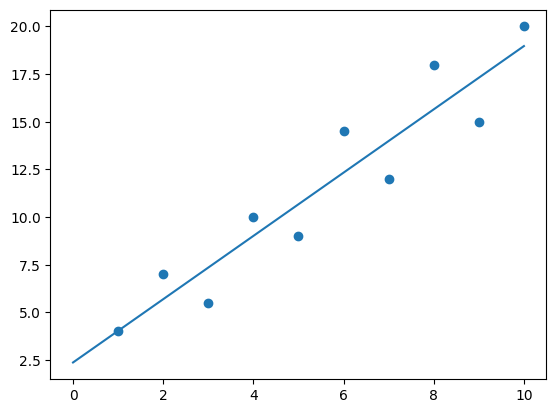

In [11]:
x = np.linspace(0,10,50)

y_hat = w*x + b

plt.scatter(input,output)
plt.plot(x,y_hat)
plt.show()

### visualizing linear regression

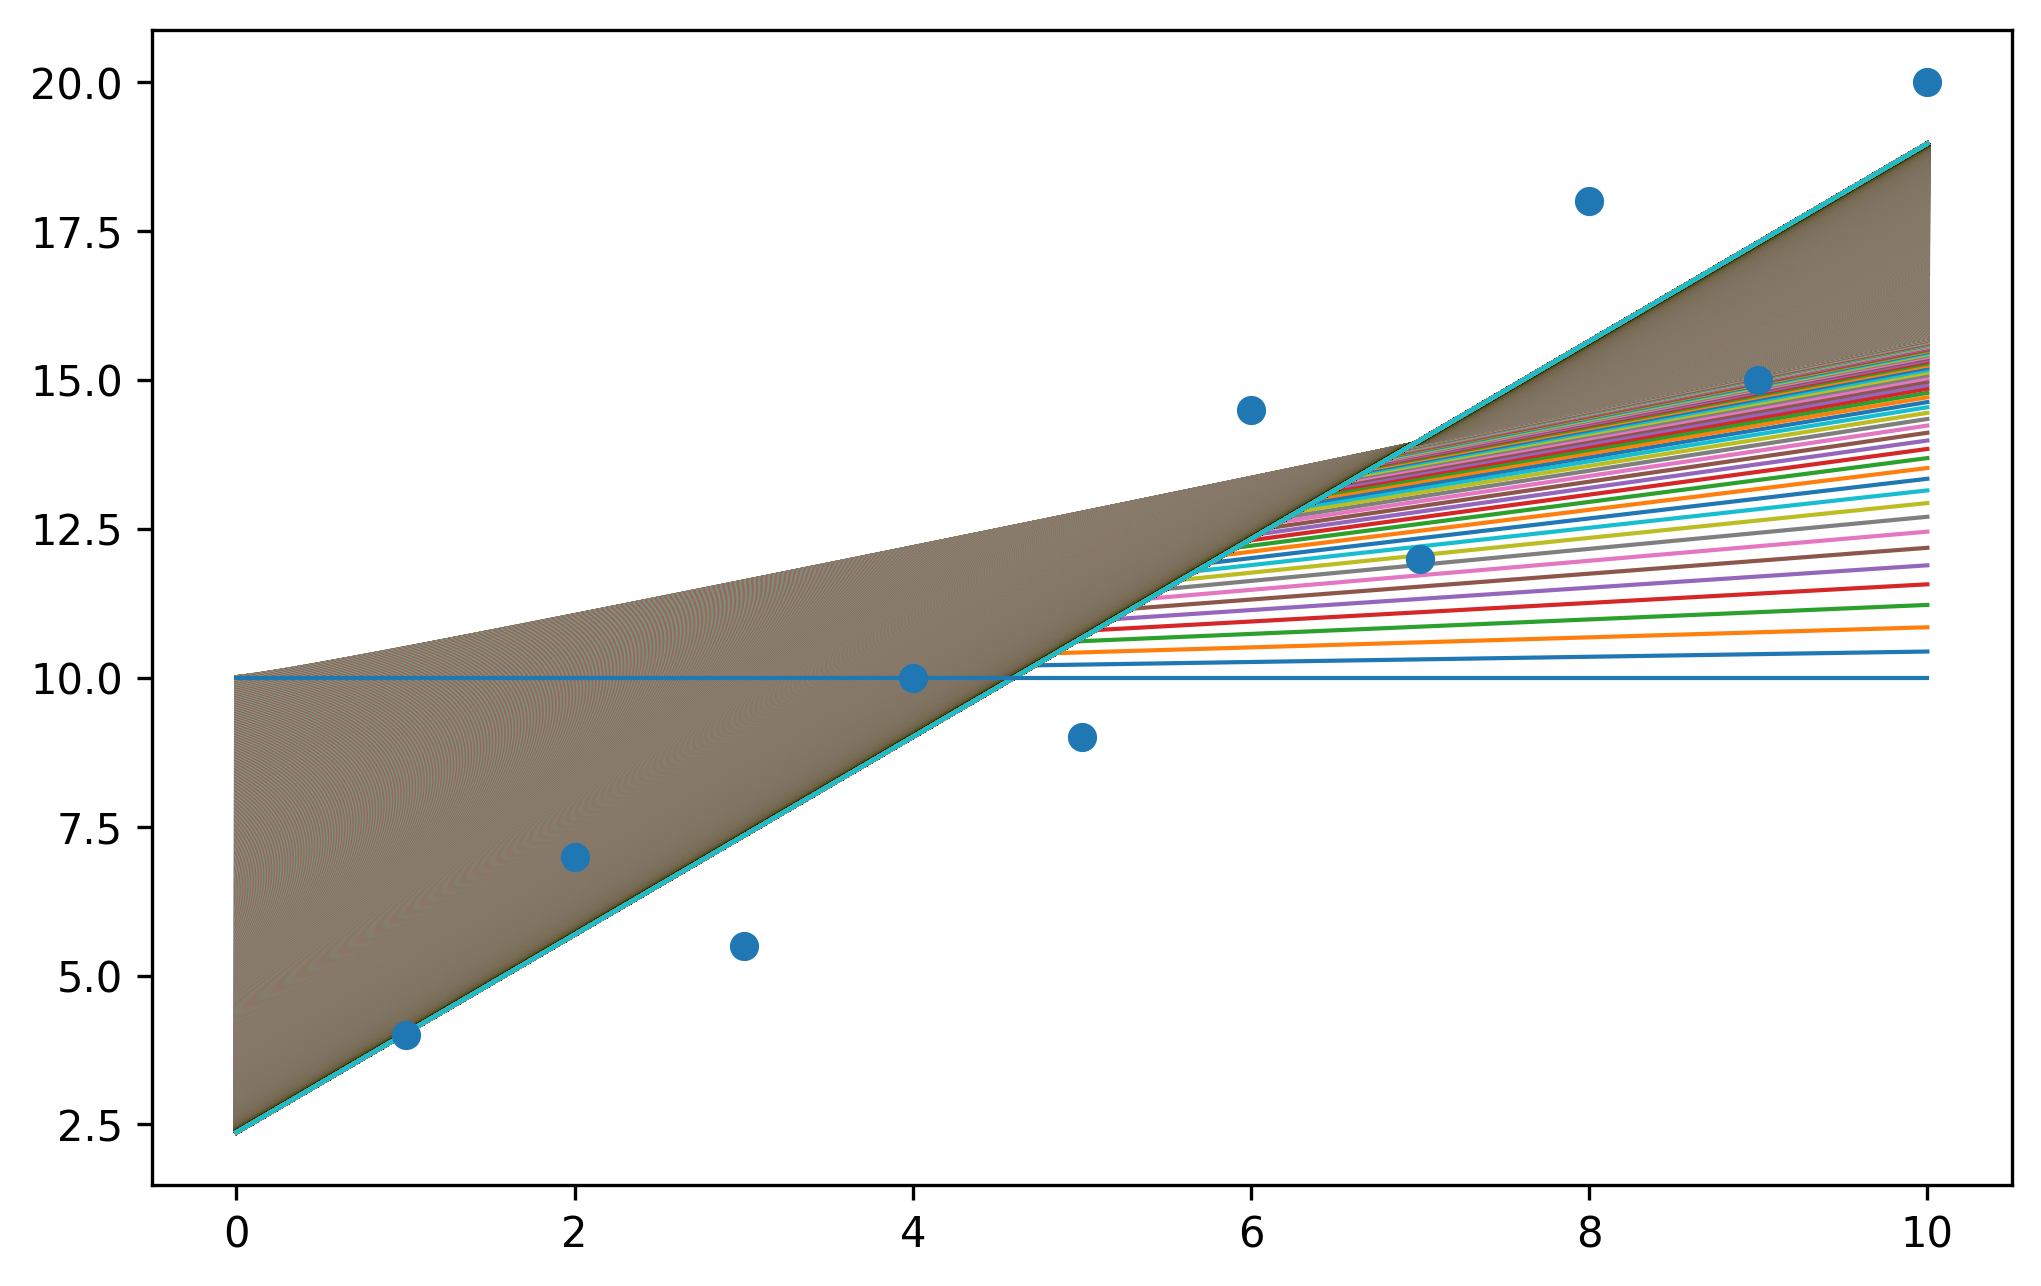

In [12]:
plt.figure(figsize=(8,5),dpi=300)
for w,b in parameter_list:    
    x = np.linspace(0,10,50)
    # y start
    y_start = 0*x + 5
    # updated during training
    y = w*x + b

    plt.plot(x,y, linewidth = 1)

x_start = np.linspace(0,10,50)    
y_start = 0*x + 10
plt.plot(x_start,y_start, linewidth = 1)
plt.scatter(input,output, zorder=5)
plt.show()

# Part 2: Linear Regression by Least Squered Errors

$$
y = a + bX
$$

$$
b = \frac{\sum x_i y_i - n \bar{x} \bar{y}}{\sum x_i^2 - n \bar{x}^2}
$$

$$
a = \frac{\sum y_i - b \sum x_i}{n}
$$


Load same data

In [13]:
xi = df["input"]
yi = df["output"]

Define paramters

In [14]:
xi = xi
yi = yi
xi_times_yi = xi * yi
xi_hat2 = xi**2
yi_hat2 = yi**2
n = len(xi)

sum_xi = np.sum(xi)
sum_yi = np.sum(yi)
sum_xi_times_yi = np.sum(xi_times_yi)
sum_xi_hat2 = np.sum(xi_hat2)
sum_yi_hat2 = np.sum(yi_hat2)

mean_xi = np.mean(xi)
mean_yi = np.mean(yi)

Compute a and b

In [15]:
b_ = ((n*sum_xi_times_yi)-(sum_xi*sum_yi))/((n*sum_xi_hat2)-(sum_xi)**2)
b_ = round(b_,2)

a = (sum_yi - b_*sum_xi)/n
print(b_)

1.66


Linear regression

In [16]:
print(f"Linear regression: y = {round(a,2)} * x + {round(b_,2)}")

Linear regression: y = 2.37 * x + 1.66


# Conclusion

In [21]:
print(f"Method 1: y = {round(w,2)} * x + {round(b,2)}")
print(f"Method 2: y = {round(b_,2)} * x + {round(a,2)}")

Method 1: y = 1.66 * x + 2.37
Method 2: y = 1.66 * x + 2.37
